In [69]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from matplotlib.animation import FuncAnimation


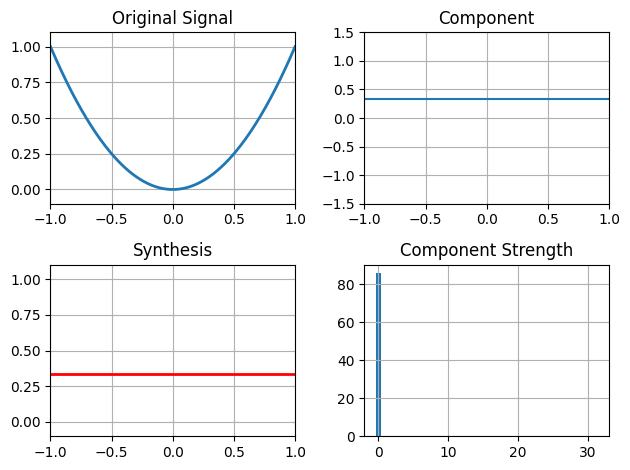

In [73]:
def f(x):
    return x ** 2

def update(frm_no, axs, x, y, Y, 
           MaxCutOff = 32,
           y_top=1.1, y_btm=-0.1, 
           c_top=1.5, c_btm=-1.5):
    for ax in axs:
        ax.cla()
        ax.grid()

    # とりあえずタイトル設定
    axs[0].set_title('Original Signal')
    axs[1].set_title('Component')
    axs[2].set_title('Synthesis')
    axs[3].set_title('Component Strength')

    for fig_id in range(3):
        axs[fig_id].set_ylim(y_btm, y_top)
        axs[fig_id].set_xlim(x[0], x[-1])
    axs[1].set_ylim(c_btm, c_top)

    # 原信号描画
    axs[0].plot(x, y, linewidth=2)    

    # フィルタ各成分計算
    flt = np.zeros(len(Y))
    flt[0] = 1
    y_components = [ifft(Y*flt).real]
    for f in range(frm_no):
        flt = np.zeros(len(Y))
        flt[f+1] = 1
        flt[-f-1] = 1
        y_components.append(ifft(Y*flt).real)    

    # 各成分描画
    for yf in y_components:
        axs[1].plot(x, yf)

    # 合成信号描画
    y_sum = np.zeros_like(x)
    for yf in y_components:
        y_sum += yf
    axs[2].plot(x, y_sum, color='red', linewidth=2)
    
    # 成分強度描画
    c_bar_x = np.arange(MaxCutOff)
    c_bar_y = np.zeros(MaxCutOff)    
    c_bar_y[:frm_no+1] = np.abs(Y[:frm_no+1])
    axs[3].bar(c_bar_x, c_bar_y)

    plt.tight_layout()

N = 256

x = np.linspace(-1, 1, N)
y = f(x)
Y = fft(y)

fig, axs = plt.subplots(2, 2)
axs = axs.flatten()

# update(3, axs, x, y, Y, y_btm=-0.1)

MaxFrames = 32
y_btm = -0.1
anim = FuncAnimation(fig, update, frames=range(MaxFrames),
                     fargs=(axs, x, y, Y), 
                     interval=500, repeat=True)
anim.save('TmpImages/funcdemo.mp4', writer='ffmpeg')



<BarContainer object of 5 artists>

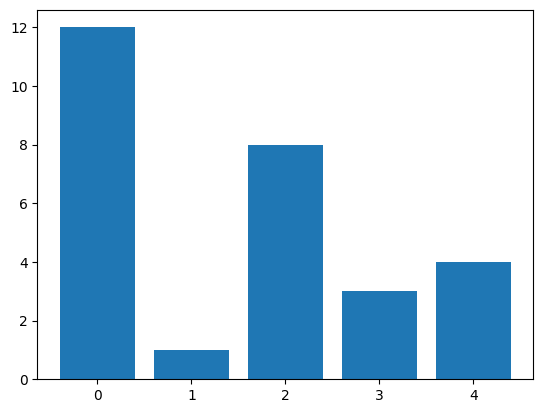

In [46]:
c_bar_x = np.arange(5)
c_bar_y = np.random.randint(1, 15, 5)

fig, ax = plt.subplots(1, 1)
ax.bar(c_bar_x, c_bar_y)

In [27]:
N = 16
xx = np.arange(N)
flt = np.zeros(N)
flt[0] = 1

cidx = 0
print(cidx, flt)
for cidx in range(1, N//2):
    flt[:cidx+1] = 1
    flt[-cidx:] = 1
    
    print(cidx, flt)

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
3 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
4 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
5 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
6 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
7 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
